In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('gemstone.csv')

In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
df1=df.drop('id',axis=1)
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [10]:
df1.duplicated().sum()

0

In [24]:
numerical_features=df.columns[df.dtypes!='object']
categorical_features=df.columns[df.dtypes=='object']
print(numerical_features)
print(categorical_features)


Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [25]:
df[categorical_features].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
df1['cut'].value_counts()

Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64

In [14]:
df1['color'].value_counts()

G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64

In [15]:
df1['clarity'].value_counts()

SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64

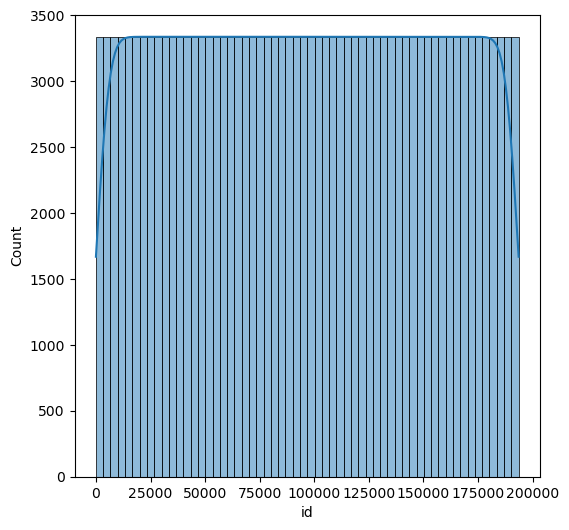

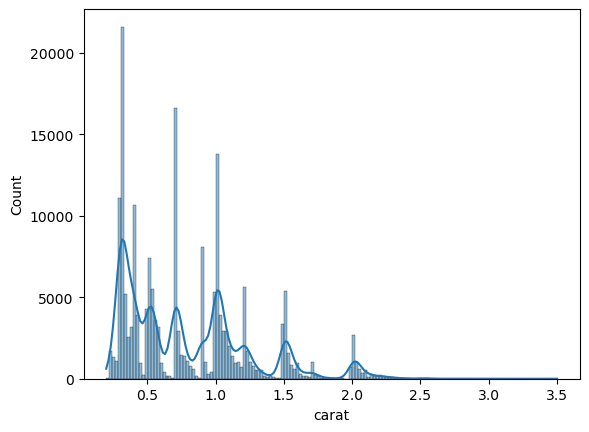

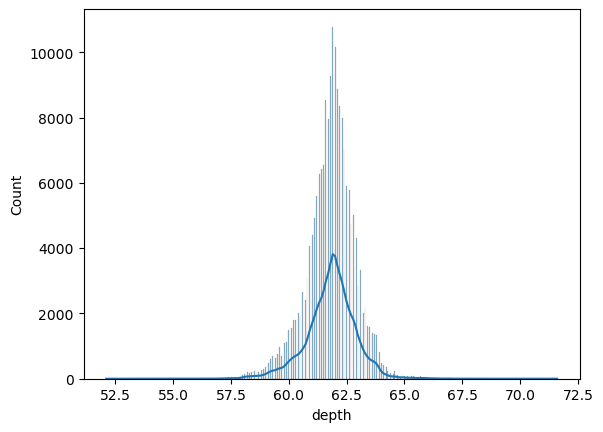

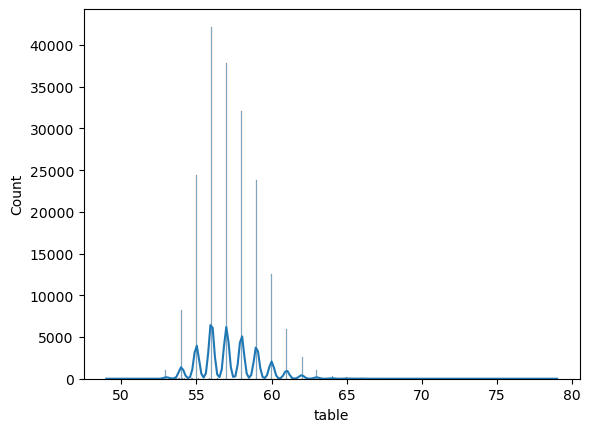

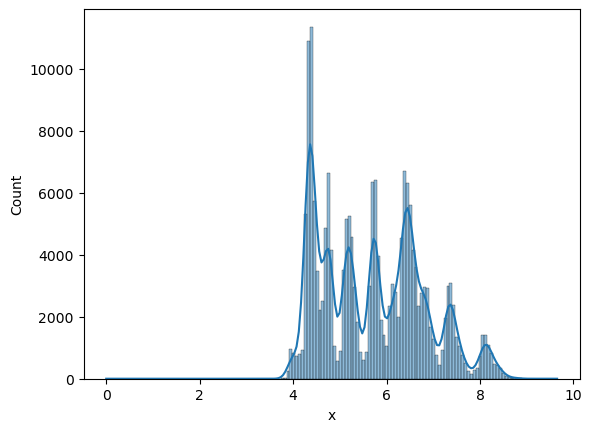

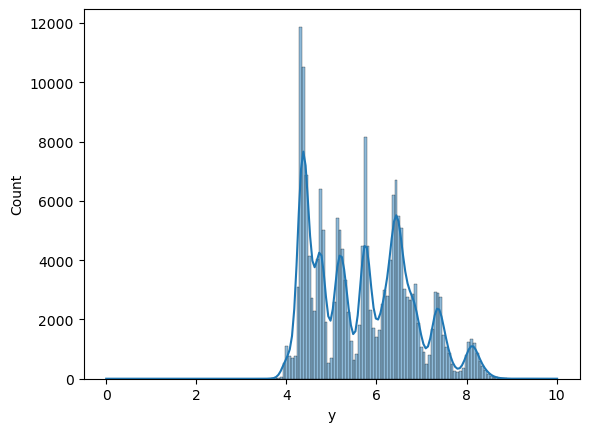

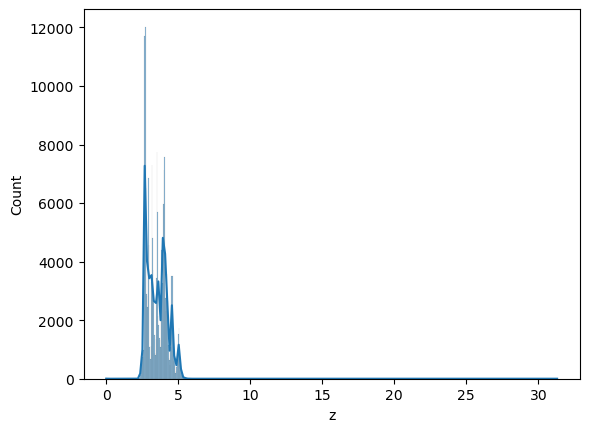

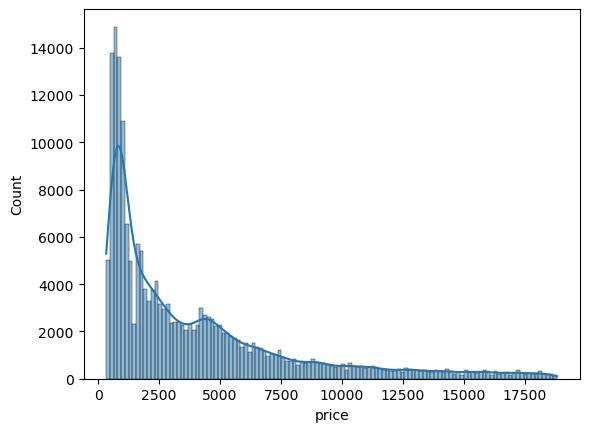

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
x=0
for i in numerical_features:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

<Figure size 600x600 with 0 Axes>

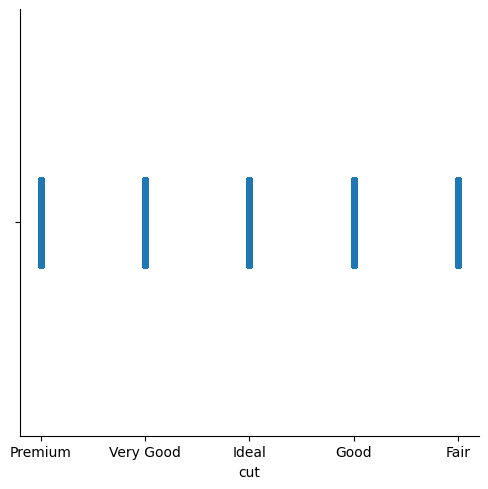

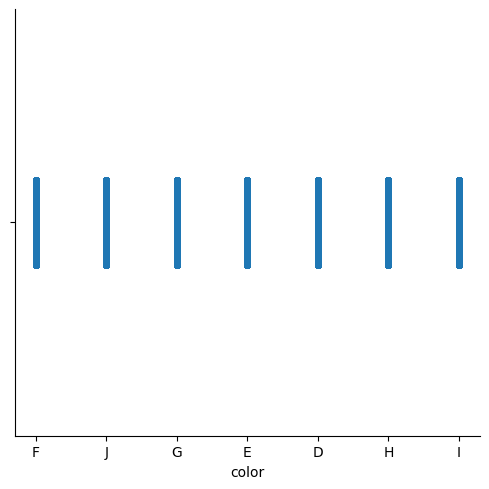

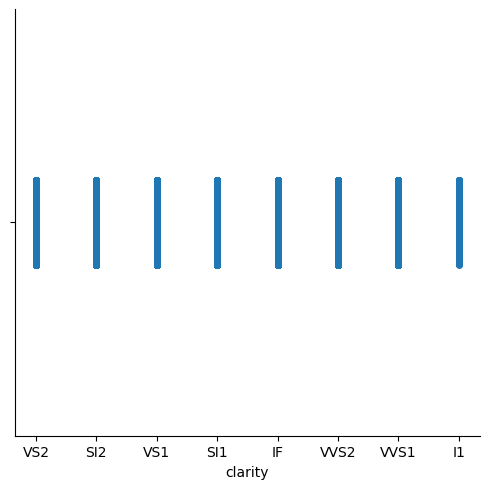

In [21]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(6,6))
x=0
for i in categorical_features:
    sns.catplot(data=df,x=i)
    print("\n")
    plt.show()

<Axes: >

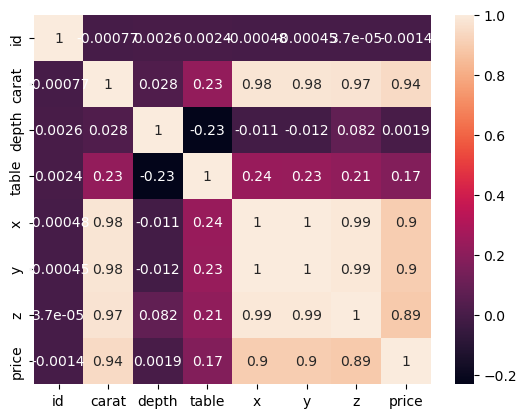

In [27]:
sns.heatmap(df[numerical_features].corr(),annot=True)

In [28]:
cut_map={'Ideal':5,       
'Premium':4,    
'Very Good':3,   
'Good':2,        
'Fair':1}

In [29]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [30]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [31]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [32]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
